In [6]:
# author: René Kopeinig
# script: 
# description:

In [7]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [70]:
# Import dependencies
import os, quandl, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [56]:
# Firstly: Get data from Quandl
# What is Quandl? It is a marketplace for financial, economic and alternative data 
# delivered in modern formats for today's analysts, including Python.

def get_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    print cache_path
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [57]:
# Get Ethereum Data
gdax_eth_eur = get_data('GDAX/ETH_EUR')
gdax_eth_eur['Mean'] = (gdax_eth_eur['High']+gdax_eth_eur['Low'])/2

GDAX-ETH_EUR.pkl
Loaded GDAX/ETH_EUR from cache


In [58]:
# Clean data
del gdax_eth_eur['Volume'],gdax_eth_eur['Open'],gdax_eth_eur['Low'],gdax_eth_eur['High']

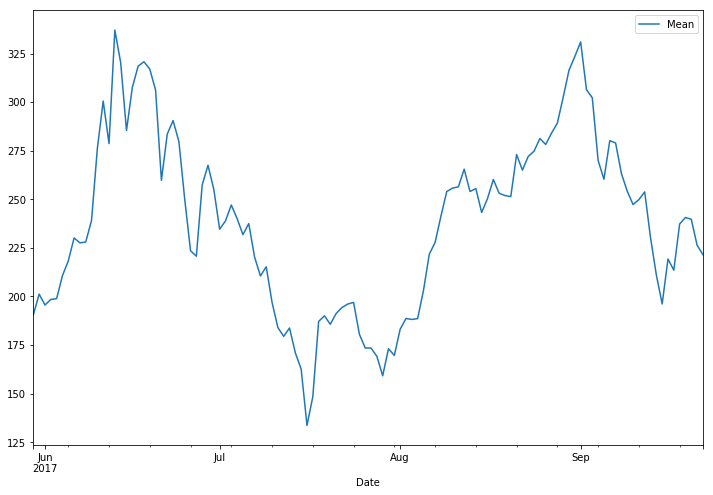

In [59]:
gdax_eth_eur.plot(figsize=(12,8));

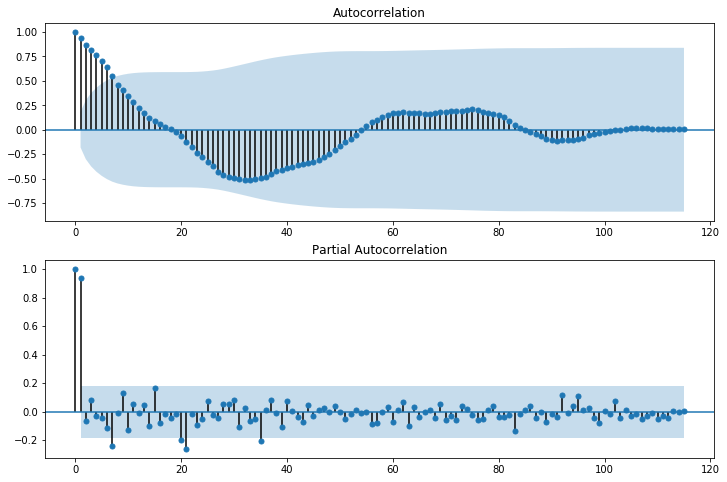

In [65]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gdax_eth_eur.values.squeeze(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gdax_eth_eur, ax=ax2)

In [66]:
arma_mod20 = sm.tsa.ARMA(gdax_eth_eur, (2,0)).fit(disp=False)
print(arma_mod20.params)

const         232.474278
ar.L1.Mean      1.021049
ar.L2.Mean     -0.087960
dtype: float64


In [80]:
arma_mod30 = sm.tsa.ARMA(gdax_eth_eur, (3,0)).fit(disp=False)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

(971.3215895686333, 982.33595033305869, 975.7927908666951)


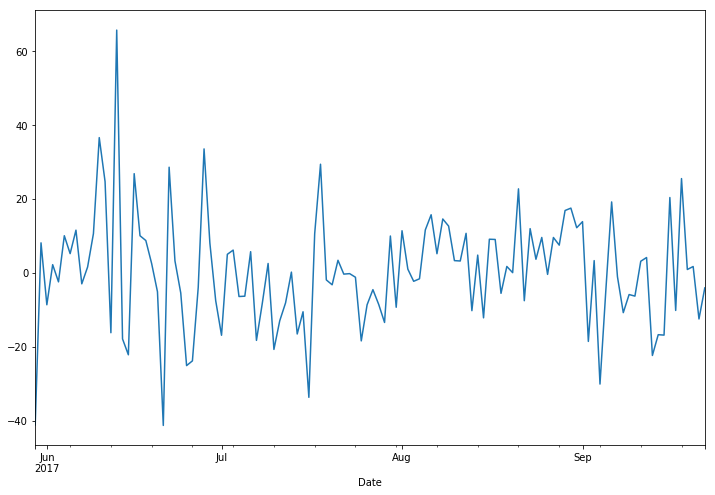

In [81]:
sm.stats.durbin_watson(arma_mod30.resid.values)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

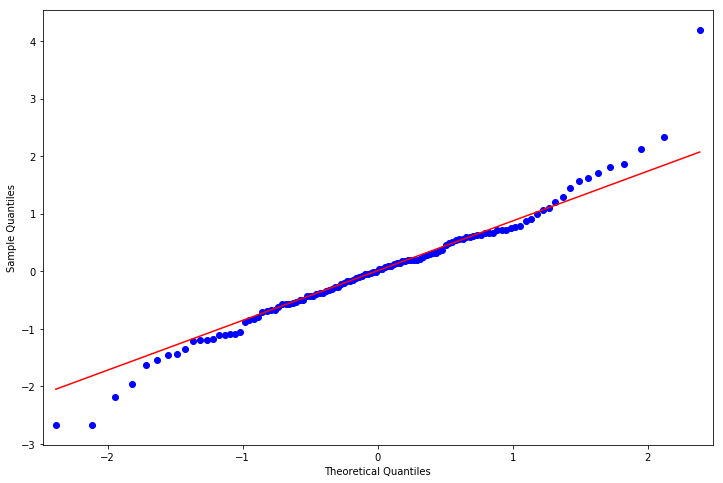

In [82]:
resid = arma_mod30.resid
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

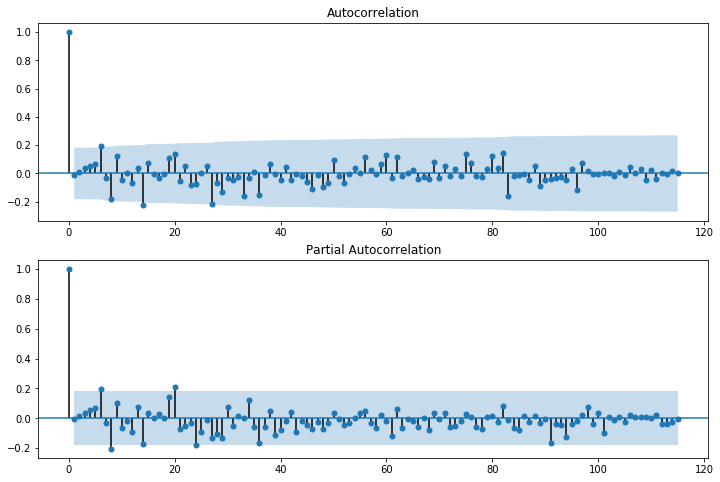

In [83]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, ax=ax2)

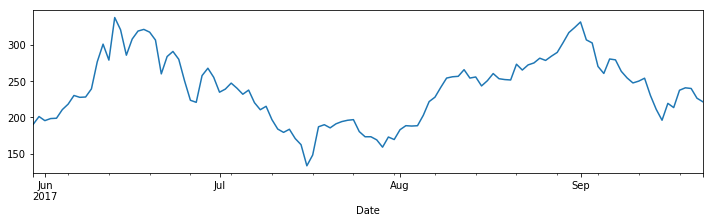

In [89]:
# Plot the dataset
gdax_eth_eur['Mean'].plot(figsize=(12, 3))

# Fit the model
mod_kns = sm.tsa.MarkovRegression(gdax_eth_eur['Mean'], k_regimes=3, trend='nc', switching_variance=True)
#res_kns = mod_kns.fit()

In [93]:
res_kns = mod_kns.fit()
res_kns.summary()

RuntimeError: Steady-state probabilities could not be constructed.